  #         Fraudulent Transactions Prediction

In [1]:
import pandas as pd
import numpy as np

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data=pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### 1.Preprocessing

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
# categories that have most frauds
fraud_counts = data.groupby('type')['isFraud'].sum().sort_values(ascending=False)
print(fraud_counts)

type
CASH_OUT    4116
TRANSFER    4097
CASH_IN        0
DEBIT          0
PAYMENT        0
Name: isFraud, dtype: int64


In [11]:
#Legit transactions in these categrories
legit_cashout = data[(data['type'] == 'CASH_OUT') & (data['isFraud'] == 0)]
print("Number of legit CASH_OUT transactions:", len(legit_cashout))

legit_transfer = data[(data['type'] == 'TRANSFER') & (data['isFraud'] == 0)]
print("Number of legit TRANSFER transactions:", len(legit_transfer))

Number of legit CASH_OUT transactions: 2233384
Number of legit TRANSFER transactions: 528812


In [12]:
#here the data is very much unbalanced.
#so for these dfs, I'm randomly selecting a subset of rows from the original df.

In [13]:
df1 = data.loc[(data.isFraud == 1) & (data['type'] == 'CASH_OUT')]
df2 = data.loc[(data.isFraud == 1) & (data['type'] == 'TRANSFER')]
df3 = data.loc[(data.isFraud == 0) & (data['type'] == 'CASH_OUT')].sample(frac=0.002)
df4 = data.loc[(data.isFraud == 0) & (data['type'] == 'TRANSFER')].sample(frac=0.008)

In [14]:
newdata= pd.concat([df1,df2, df3, df4])
from sklearn.utils import shuffle
newdata= shuffle(newdata)

In [15]:
newdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6039583,483,TRANSFER,7576324.61,C149249593,7576324.61,0.0,C210740885,0.00,0.00,1,0
5034995,354,CASH_OUT,24878.90,C1747611982,0.00,0.0,C1685398675,1981291.30,2006170.20,0,0
6362484,731,TRANSFER,219275.19,C868020518,219275.19,0.0,C1828774978,0.00,0.00,1,0
588653,33,CASH_OUT,275672.20,C1833624442,0.00,0.0,C1019890235,332277.56,1081357.34,0,0
5743266,399,TRANSFER,1565791.11,C1746227962,32865.00,0.0,C1586592417,6310448.53,7876239.64,0,0


In [16]:
newdata['isFraud'].value_counts()

0    8697
1    8213
Name: isFraud, dtype: int64

In [17]:
#converting type column to labels with the help of labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(newdata['type'])
label

array([1, 0, 1, ..., 1, 0, 1])

In [18]:
# Inserting converted type data into our dataset
newdata.insert(2,'type_num', label)

In [19]:
newdata.type_num.unique()

array([1, 0])

In [20]:
# there is a character 'c' in the columns of nameOrig & nameDest.
# converting those values into numbers only format
newdata['nameOrig'] = newdata['nameOrig'].replace({'C': ''}, regex=True)
newdata['nameDest'] = newdata['nameDest'].replace({'C': ''}, regex=True)
newdata.head()

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6039583,483,TRANSFER,1,7576324.61,149249593,7576324.61,0.0,210740885,0.00,0.00,1,0
5034995,354,CASH_OUT,0,24878.90,1747611982,0.00,0.0,1685398675,1981291.30,2006170.20,0,0
6362484,731,TRANSFER,1,219275.19,868020518,219275.19,0.0,1828774978,0.00,0.00,1,0
588653,33,CASH_OUT,0,275672.20,1833624442,0.00,0.0,1019890235,332277.56,1081357.34,0,0
5743266,399,TRANSFER,1,1565791.11,1746227962,32865.00,0.0,1586592417,6310448.53,7876239.64,0,0


In [21]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 6039583 to 6145035
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16910 non-null  int64  
 1   type            16910 non-null  object 
 2   type_num        16910 non-null  int32  
 3   amount          16910 non-null  float64
 4   nameOrig        16910 non-null  object 
 5   oldbalanceOrg   16910 non-null  float64
 6   newbalanceOrig  16910 non-null  float64
 7   nameDest        16910 non-null  object 
 8   oldbalanceDest  16910 non-null  float64
 9   newbalanceDest  16910 non-null  float64
 10  isFraud         16910 non-null  int64  
 11  isFlaggedFraud  16910 non-null  int64  
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 1.6+ MB


In [22]:
# converting these values into numeric data
newdata['nameDest'] = pd.to_numeric(newdata['nameDest'])
newdata

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6039583,483,TRANSFER,1,7576324.61,149249593,7576324.61,0.0,210740885,0.00,0.00,1,0
5034995,354,CASH_OUT,0,24878.90,1747611982,0.00,0.0,1685398675,1981291.30,2006170.20,0,0
6362484,731,TRANSFER,1,219275.19,868020518,219275.19,0.0,1828774978,0.00,0.00,1,0
588653,33,CASH_OUT,0,275672.20,1833624442,0.00,0.0,1019890235,332277.56,1081357.34,0,0
5743266,399,TRANSFER,1,1565791.11,1746227962,32865.00,0.0,1586592417,6310448.53,7876239.64,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5299360,373,CASH_OUT,0,218707.85,587602467,0.00,0.0,1120001617,389572.03,608279.88,0,0
1030315,56,TRANSFER,1,42789.93,353411083,42789.93,0.0,803277933,0.00,0.00,1,0
6006721,430,TRANSFER,1,326394.80,541833778,326394.80,0.0,36684141,0.00,0.00,1,0
5099867,355,CASH_OUT,0,42483.97,1595793252,42483.97,0.0,636454309,51495.75,93979.72,1,0


In [23]:
newdata['nameOrig'] = pd.to_numeric(newdata['nameOrig'])
newdata

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6039583,483,TRANSFER,1,7576324.61,149249593,7576324.61,0.0,210740885,0.00,0.00,1,0
5034995,354,CASH_OUT,0,24878.90,1747611982,0.00,0.0,1685398675,1981291.30,2006170.20,0,0
6362484,731,TRANSFER,1,219275.19,868020518,219275.19,0.0,1828774978,0.00,0.00,1,0
588653,33,CASH_OUT,0,275672.20,1833624442,0.00,0.0,1019890235,332277.56,1081357.34,0,0
5743266,399,TRANSFER,1,1565791.11,1746227962,32865.00,0.0,1586592417,6310448.53,7876239.64,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5299360,373,CASH_OUT,0,218707.85,587602467,0.00,0.0,1120001617,389572.03,608279.88,0,0
1030315,56,TRANSFER,1,42789.93,353411083,42789.93,0.0,803277933,0.00,0.00,1,0
6006721,430,TRANSFER,1,326394.80,541833778,326394.80,0.0,36684141,0.00,0.00,1,0
5099867,355,CASH_OUT,0,42483.97,1595793252,42483.97,0.0,636454309,51495.75,93979.72,1,0


In [24]:
#dropping the unwanted columns
#also dropping the target variable
cdata=newdata.drop(columns =['type','isFraud'])

In [25]:
cdata

,step,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
6039583,483,1,7576324.61,149249593,7576324.61,0.0,210740885,0.00,0.00,0
5034995,354,0,24878.90,1747611982,0.00,0.0,1685398675,1981291.30,2006170.20,0
6362484,731,1,219275.19,868020518,219275.19,0.0,1828774978,0.00,0.00,0
588653,33,0,275672.20,1833624442,0.00,0.0,1019890235,332277.56,1081357.34,0
5743266,399,1,1565791.11,1746227962,32865.00,0.0,1586592417,6310448.53,7876239.64,0
...,...,...,...,...,...,...,...,...,...,...
5299360,373,0,218707.85,587602467,0.00,0.0,1120001617,389572.03,608279.88,0
1030315,56,1,42789.93,353411083,42789.93,0.0,803277933,0.00,0.00,0
6006721,430,1,326394.80,541833778,326394.80,0.0,36684141,0.00,0.00,0
5099867,355,0,42483.97,1595793252,42483.97,0.0,636454309,51495.75,93979.72,0


In [26]:
y=newdata.isFraud
y

6039583    1
5034995    0
6362484    1
588653     0
5743266    0
          ..
5299360    0
1030315    1
6006721    1
5099867    1
6145035    1
Name: isFraud, Length: 16910, dtype: int64

In [27]:
#Irrelevant or partially relevant features can negatively impact model performance.
#so using feature importance here
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(cdata,y)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_)

[0.17800576 0.03373943 0.11202879 0.01729489 0.36061152 0.03998306
 0.01713757 0.09252827 0.14814446 0.00052625]


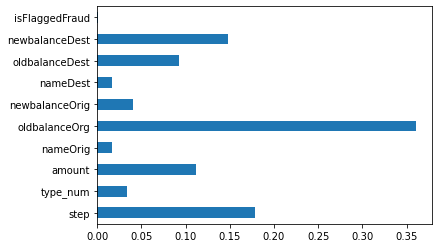

In [29]:
#ploting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=cdata.columns)
feat_importances.plot(kind='barh')
plt.show()

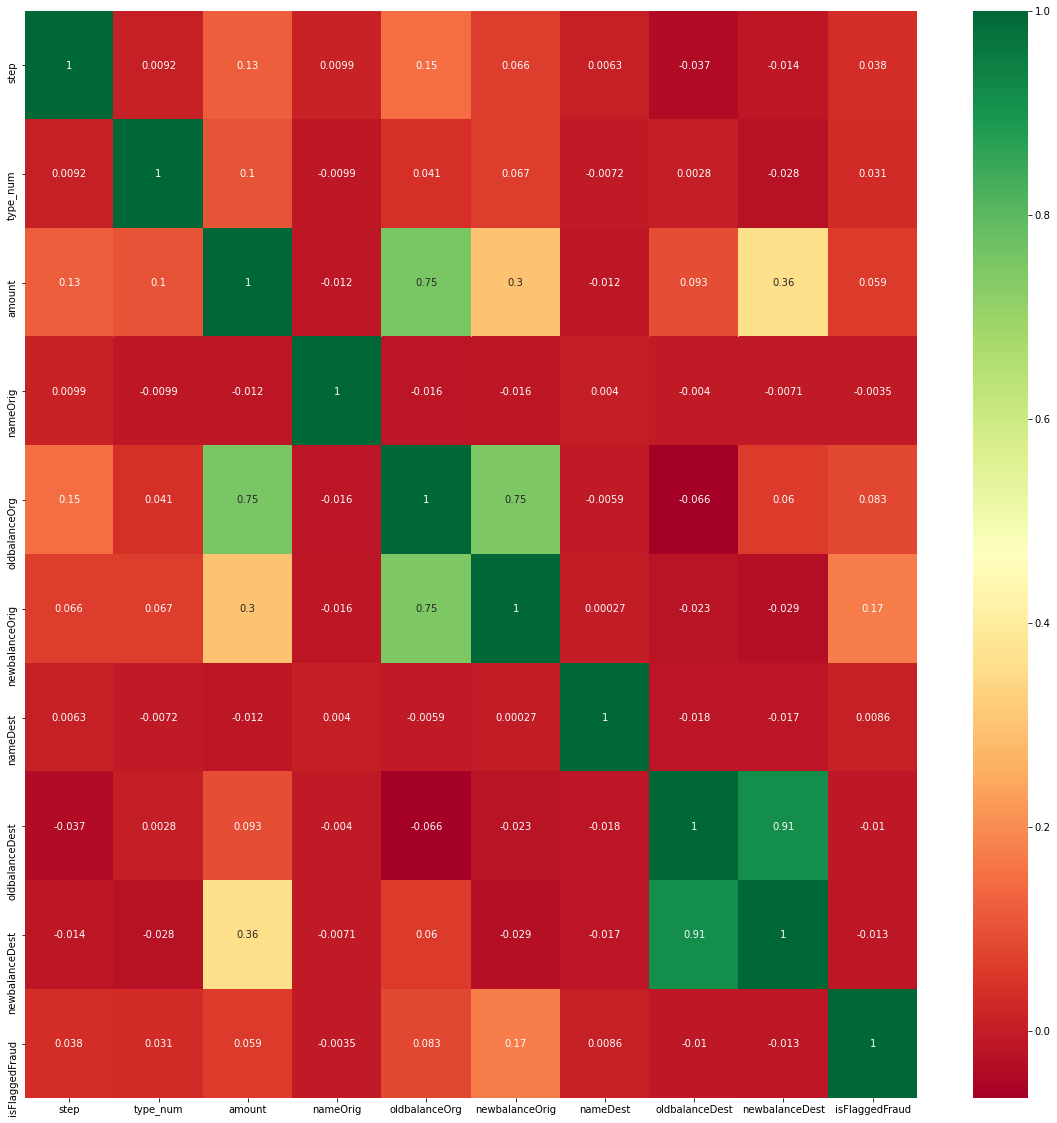

In [30]:
#checking the correlation also
import seaborn as sns
corrmat = cdata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(cdata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
#from above plots, its is clear that the features "nameOrig","nameDest","isFlaggedFraud" doesn't play a major role in decision making
#basically the feauters "nameOrig","nameDest" are just some string values which has no any any significance to our data
X= cdata.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [32]:
X

,step,type_num,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6039583,483,1,7576324.61,7576324.61,0.0,0.00,0.00
5034995,354,0,24878.90,0.00,0.0,1981291.30,2006170.20
6362484,731,1,219275.19,219275.19,0.0,0.00,0.00
588653,33,0,275672.20,0.00,0.0,332277.56,1081357.34
5743266,399,1,1565791.11,32865.00,0.0,6310448.53,7876239.64
...,...,...,...,...,...,...,...
5299360,373,0,218707.85,0.00,0.0,389572.03,608279.88
1030315,56,1,42789.93,42789.93,0.0,0.00,0.00
6006721,430,1,326394.80,326394.80,0.0,0.00,0.00
5099867,355,0,42483.97,42483.97,0.0,51495.75,93979.72


In [33]:
y

6039583    1
5034995    0
6362484    1
588653     0
5743266    0
          ..
5299360    0
1030315    1
6006721    1
5099867    1
6145035    1
Name: isFraud, Length: 16910, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
# the range of values for each feauters is widely scattered. so performed feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Preprocessing is Done.
### dataset is ready for classification

#### Using Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1764
           1       0.94      0.87      0.90      1618

    accuracy                           0.91      3382
   macro avg       0.92      0.91      0.91      3382
weighted avg       0.91      0.91      0.91      3382



Text(69.0, 0.5, 'Truth')

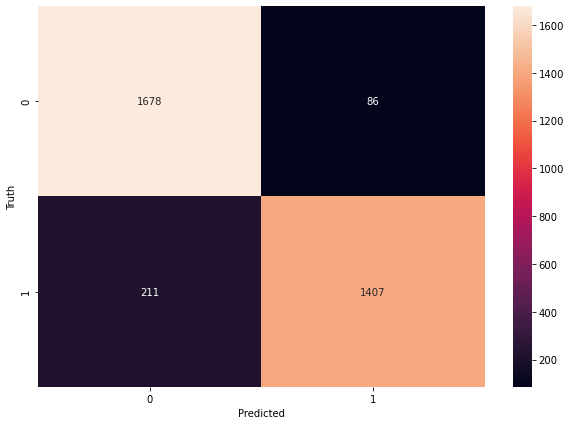

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### using Naive bayes


In [40]:
from sklearn.naive_bayes import GaussianNB
bs = GaussianNB()
bs.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = bs.predict(X_test)

In [42]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80      1764
           1       0.95      0.49      0.64      1618

    accuracy                           0.74      3382
   macro avg       0.81      0.73      0.72      3382
weighted avg       0.81      0.74      0.72      3382



Text(69.0, 0.5, 'Truth')

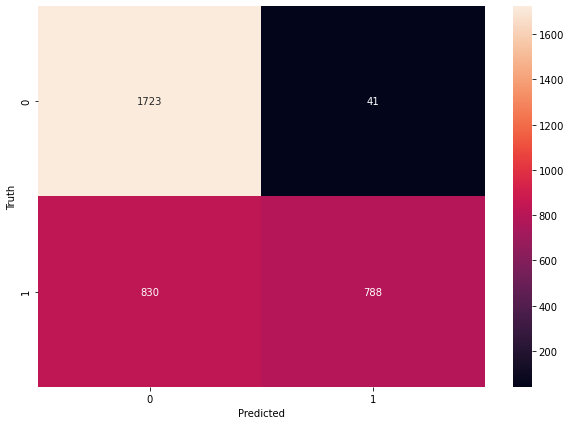

In [44]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### using svm


In [45]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [46]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1764
           1       0.93      0.87      0.90      1618

    accuracy                           0.90      3382
   macro avg       0.91      0.90      0.90      3382
weighted avg       0.91      0.90      0.90      3382



Text(69.0, 0.5, 'Truth')

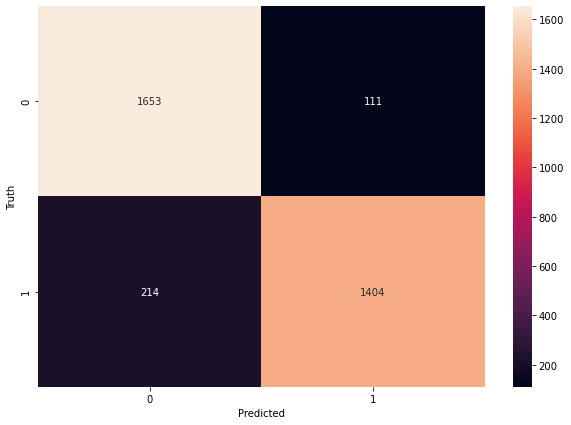

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

####  using Decision tree


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [50]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1764
           1       0.99      0.99      0.99      1618

    accuracy                           0.99      3382
   macro avg       0.99      0.99      0.99      3382
weighted avg       0.99      0.99      0.99      3382



Text(69.0, 0.5, 'Truth')

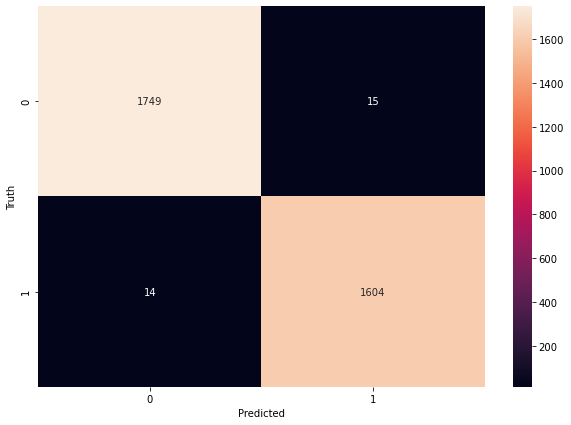

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1764
           1       0.99      0.99      0.99      1618

    accuracy                           0.99      3382
   macro avg       0.99      0.99      0.99      3382
weighted avg       0.99      0.99      0.99      3382



Text(69.0, 0.5, 'Truth')

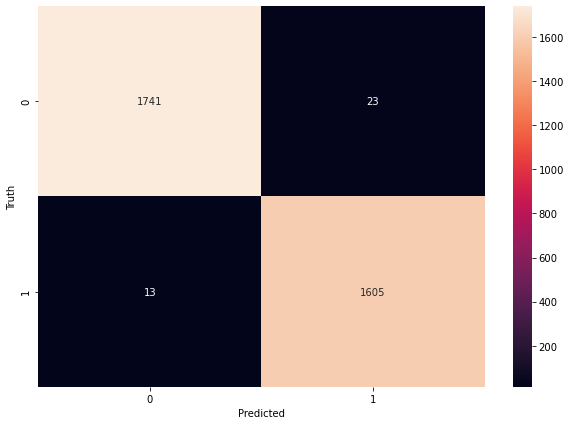

In [56]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')